In [1]:
from ads_tools import Ads
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_context('paper')

In [2]:
flats = Ads('flat')

In [3]:
flats.filter_and_transform_to_df(min_price=300.00, price_limit=15000.0, size_limit=300.0)

Dataset transfromed to a DataFrame and formatted
NA values removed from columns: 'price', 'date'


In [5]:
print(flats)

Ads dataset class. Number of observations: 109461, Number of variables: 17


In [7]:
dataset = flats.filtered_data

In [12]:
dataset.head()

,adress,price,coords,date,advertiser,available,n_rooms,n_bath,location,desc,smoking,parking,animals,type,street_regex,size_m2,url
1001294596470910467972909,Giełdowa,3200.0,NaN,2017-08-13,agency,None,2.0,1.0,Wola,NOWOCZESNE i ATRAKCYJNE DWUPOKOJOWE mieszkanie...,None,garage,None,Mieszkanie,"[Towarowej, Giełdowej]",48.0,https://www.gumtree.pl/a-mieszkania-i-domy-do-...
1001295618690910467972909,Biały Kamień,4000.0,NaN,2017-08-09,agency,None,2.0,1.0,Mokotow,"ATRAKCYJNY, nowocześnie urządzony apartament n...",None,garage,None,Mieszkanie,None,60.0,https://www.gumtree.pl/a-mieszkania-i-domy-do-...
1001295631820910467972909,Jana Pawła Woronicza,4500.0,NaN,2017-07-30,agency,None,2.0,1.0,Mokotow,"DWUPOZIOMOWE, NOWE mieszkanie typu SOFT LOFT u...",None,garage,None,Mieszkanie,None,60.0,https://www.gumtree.pl/a-mieszkania-i-domy-do-...
1001297367450910467972909,Puławska,3200.0,NaN,2017-07-28,agency,None,2.0,1.0,Mokotow,"Umeblowane, wykończone w wysokim standardzie m...",None,garage,None,Mieszkanie,None,56.0,https://www.gumtree.pl/a-mieszkania-i-domy-do-...
1001297456900910467972909,Mokotów,3000.0,NaN,2017-08-04,agency,None,2.0,1.0,Mokotow,W pełni umeblowane mieszkanie o powierzchni 54...,None,garage,None,Mieszkanie,"[zabaw, zabaw, [zabaw, oraz]]",54.0,https://www.gumtree.pl/a-mieszkania-i-domy-do-...


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109428 entries, 1001294596470910467972909 to 1002152500000910766928609
Data columns (total 17 columns):
adress          109176 non-null object
price           109428 non-null float64
coords          776 non-null object
date            109428 non-null datetime64[ns]
advertiser      108395 non-null object
available       42250 non-null object
n_rooms         109213 non-null float64
n_bath          54982 non-null float64
location        109428 non-null object
desc            109428 non-null object
smoking         14430 non-null object
parking         46251 non-null object
animals         19096 non-null object
type            109428 non-null object
street_regex    69276 non-null object
size_m2         109428 non-null float64
url             109428 non-null object
dtypes: datetime64[ns](1), float64(4), object(12)
memory usage: 15.0+ MB


In [14]:
dataset.describe()

C:\Users\Daniel\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,price,n_rooms,n_bath,size_m2
count,109428.000000,109213.000000,54982.000000,109428.000000
mean,3366.991318,2.348255,1.129442,61.430000
std,1701.794551,0.830630,0.351674,27.739834
min,350.000000,1.000000,1.000000,1.000000
25%,2500.000000,NaN,NaN,45.000000
50%,2900.000000,NaN,NaN,54.000000
75%,3700.000000,NaN,NaN,70.000000
max,14950.000000,6.000000,4.000000,295.000000


In [15]:
dataset.reset_index(inplace=True)

In [16]:
cols = ['price','advertiser','n_rooms','n_bath','location','smoking','size_m2','parking','animals']
dataset = dataset[cols]

In [19]:
dataset.head()

,price,advertiser,n_rooms,n_bath,location,smoking,size_m2,parking,animals
0,3200.0,agency,2.0,1.0,Wola,None,48.0,garage,None
1,4000.0,agency,2.0,1.0,Mokotow,None,60.0,garage,None
2,4500.0,agency,2.0,1.0,Mokotow,None,60.0,garage,None
3,3200.0,agency,2.0,1.0,Mokotow,None,56.0,garage,None
4,3000.0,agency,2.0,1.0,Mokotow,None,54.0,garage,None


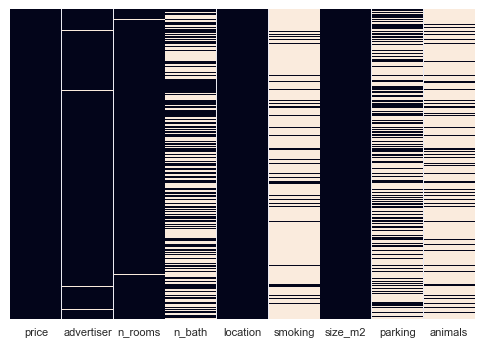

In [22]:
sns.heatmap(dataset.isnull(),cbar=False,yticklabels=False)
plt.show()

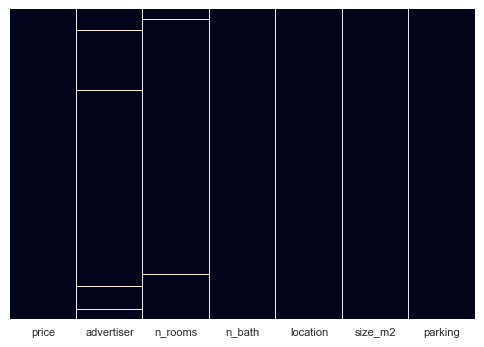

In [23]:
values = {'n_bath': 1.0, 'parking': 'no'}
dataset = dataset.fillna(value=values)

cols = ['price','advertiser','n_rooms','n_bath','location','size_m2','parking']
dataset = dataset[cols]
sns.heatmap(dataset.isnull(),cbar=False,yticklabels=False)
plt.show()

In [24]:
dataset.dropna(inplace=True)

In [25]:
dataset['price_m2'] = dataset['price']/dataset['size_m2']

In [29]:
dataset = dataset[dataset['price_m2']<450.0]

In [30]:
dataset.head(2)

,price,advertiser,n_rooms,n_bath,location,size_m2,parking,price_m2
0,3200.0,agency,2.0,1.0,Wola,48.0,garage,66.666667
1,4000.0,agency,2.0,1.0,Mokotow,60.0,garage,66.666667


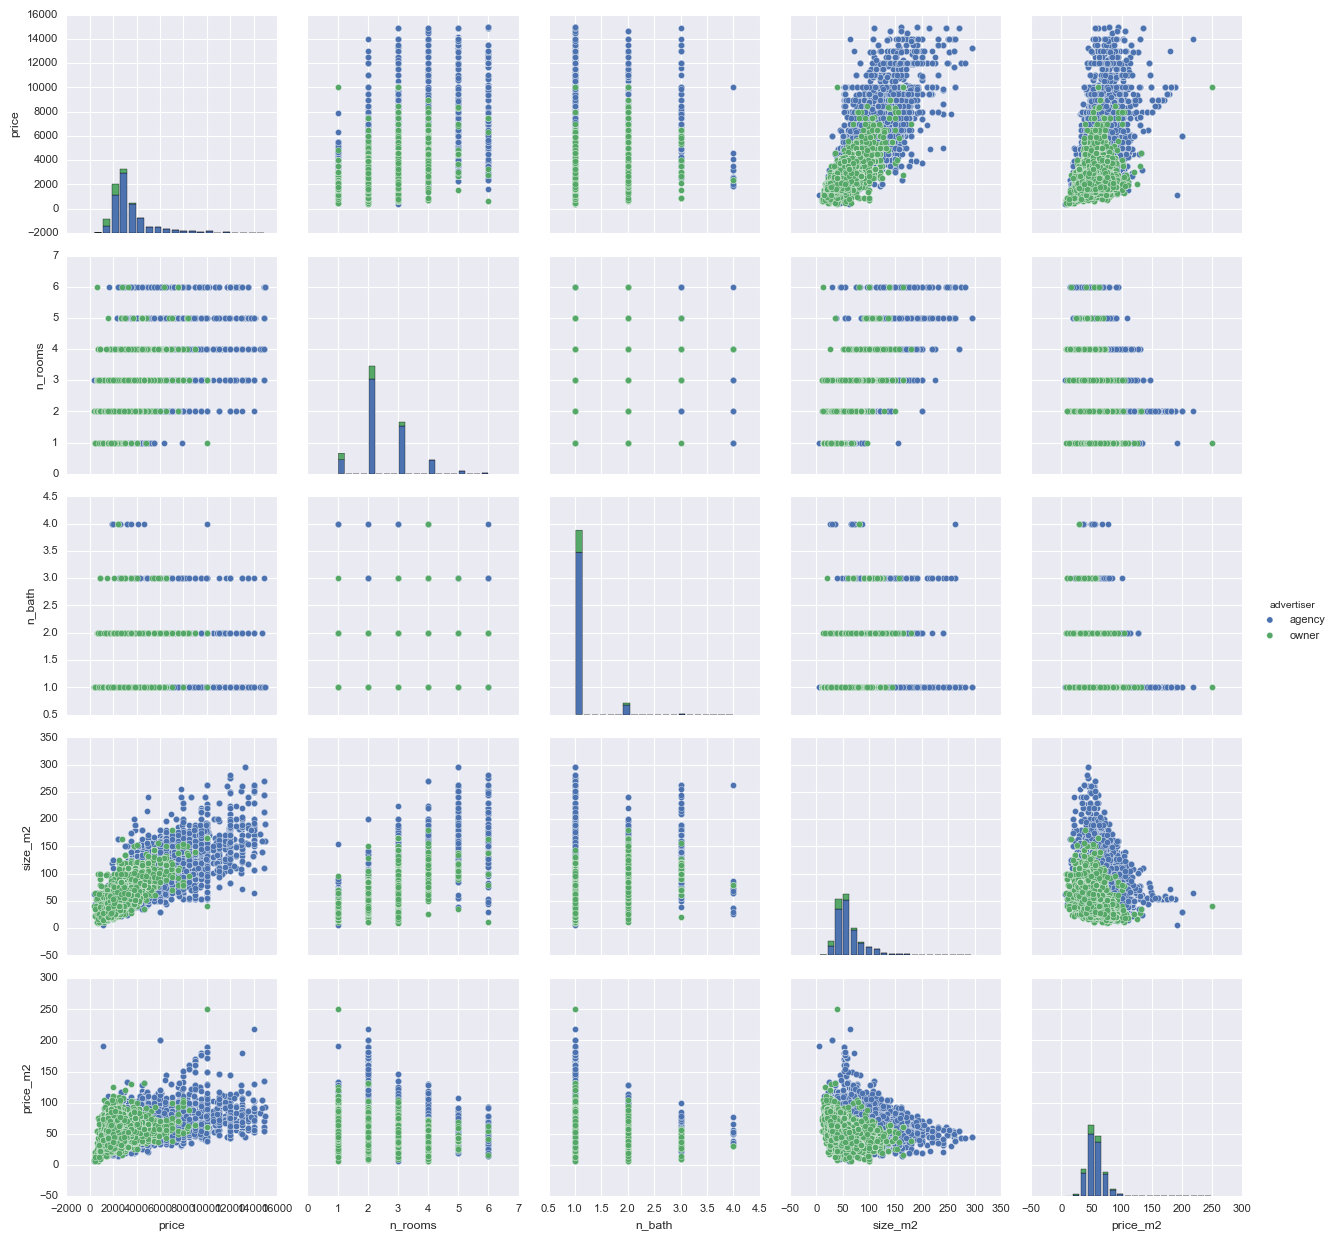

In [27]:
sns.pairplot(dataset,hue='advertiser', diag_kws=dict(bins=20))
plt.show()

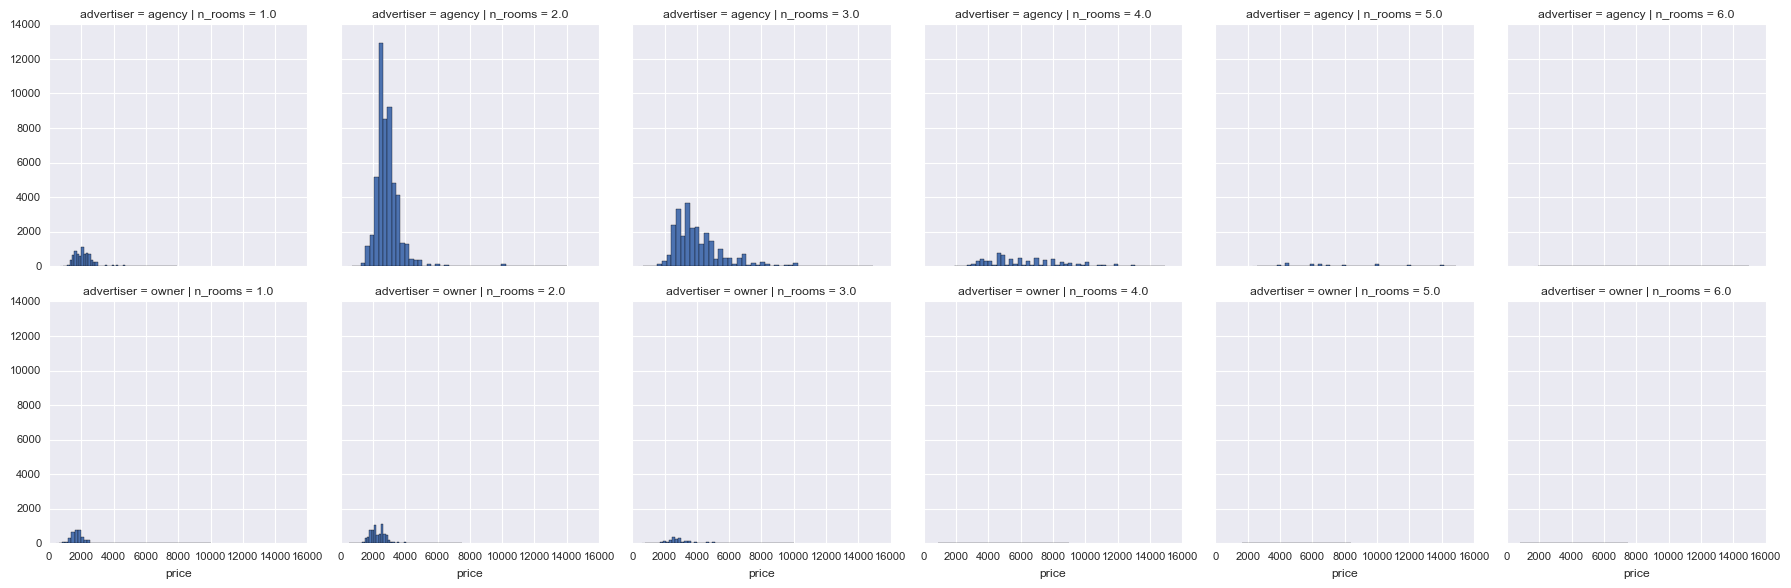

In [31]:
g = sns.FacetGrid(dataset,col='n_rooms',row='advertiser')
g.map(plt.hist,'price',bins=50)

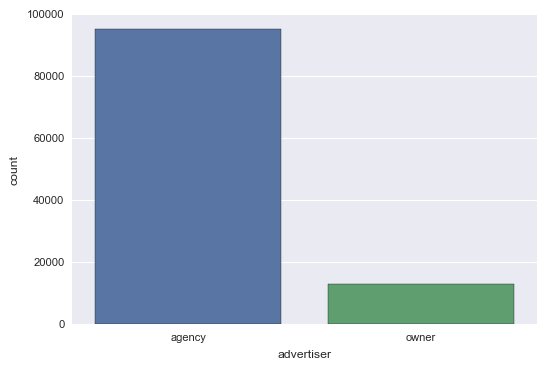

In [32]:
sns.countplot(dataset['advertiser'])

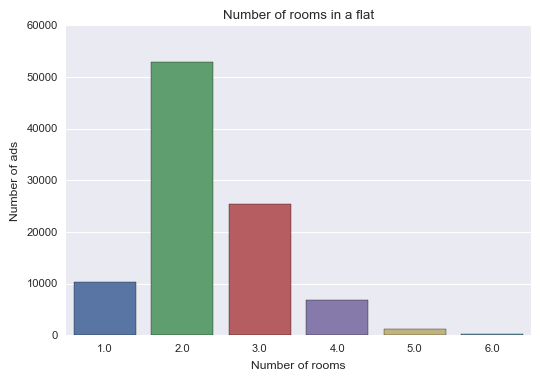

In [17]:
ax = sns.countplot(x='n_rooms',data=dataset)
ax.set(xlabel='Number of rooms', ylabel='Number of ads', title='Number of rooms in a flat')
plt.show()

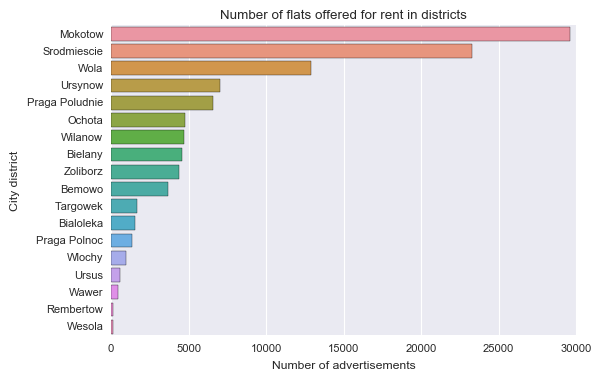

In [35]:
ranks = dataset.groupby('location')['price_m2'].count().sort_values()[::-1].index
ax = sns.countplot(y='location',data=dataset,order=ranks)
ax.set(xlabel='Number of advertisements', ylabel='City district', title='Number of flats offered for rent in districts')
plt.show()

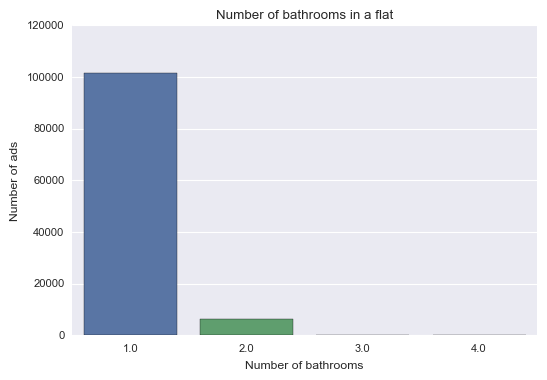

In [36]:
ax = sns.countplot(x='n_bath',data=dataset)
ax.set(xlabel='Number of bathrooms', ylabel='Number of ads', title='Number of bathrooms in a flat')
plt.show()

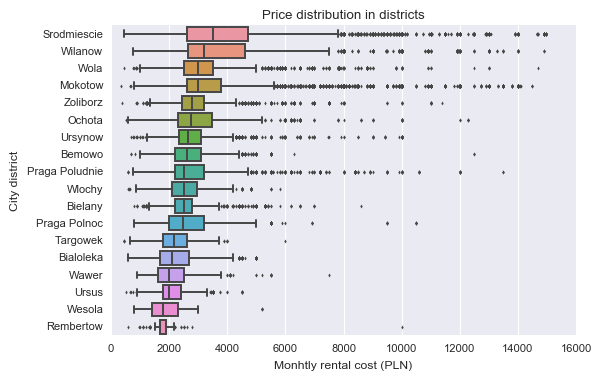

In [37]:
ranks = dataset.groupby('location')['price'].median().sort_values()[::-1].index
ax = sns.boxplot(data=dataset, y='location',x='price',fliersize=2,order=ranks)
ax.set(xlabel='Monhtly rental cost (PLN)', ylabel='City district', title='Price distribution in districts')
plt.show()

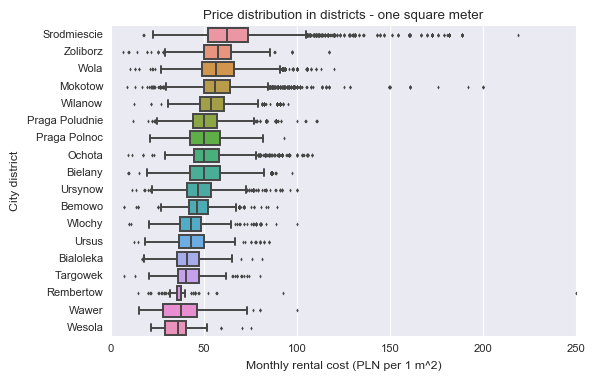

In [38]:
ranks = dataset.groupby('location')['price_m2'].median().sort_values()[::-1].index
ax = sns.boxplot(data=dataset, y='location',x='price_m2',fliersize=2,order=ranks)
ax.set(xlabel='Monthly rental cost (PLN per 1 m^2)', ylabel='City district', 
       title='Price distribution in districts - one square meter')
plt.show()

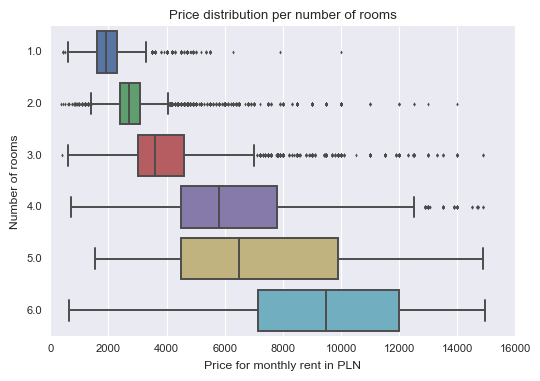

In [39]:
ax = sns.boxplot(data=dataset, y='n_rooms',x='price',fliersize=2,orient='h')
ax.set(xlabel='Price for monthly rent in PLN', ylabel='Number of rooms', title='Price distribution per number of rooms')
plt.show()

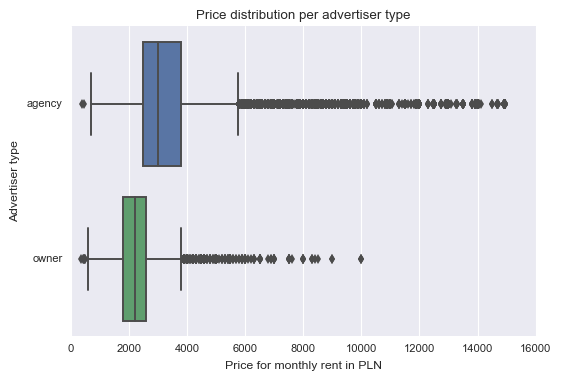

In [40]:
ax = sns.boxplot(data=dataset,y='advertiser',x='price',orient='h')
ax.set(xlabel='Price for monthly rent in PLN', ylabel='Advertiser type', title='Price distribution per advertiser type')
plt.show()

# Two-room apartments analysis

In [45]:
two_room = dataset[(dataset['n_rooms']==2.0) & (dataset['price']<6000.0)]

In [46]:
two_room.describe()

,price,n_rooms,n_bath,size_m2,price_m2
count,58879.000000,58879.0,58879.000000,58879.000000,58879.000000
mean,2780.821379,2.0,1.015421,50.327027,56.133636
std,607.954793,0.0,0.124866,9.463864,11.770140
min,350.000000,2.0,1.000000,11.000000,8.750000
25%,2400.000000,2.0,1.000000,44.000000,47.916667
50%,2700.000000,2.0,1.000000,50.000000,55.319149
75%,3000.000000,2.0,1.000000,56.000000,63.414634
max,5990.000000,2.0,4.000000,135.000000,131.428571


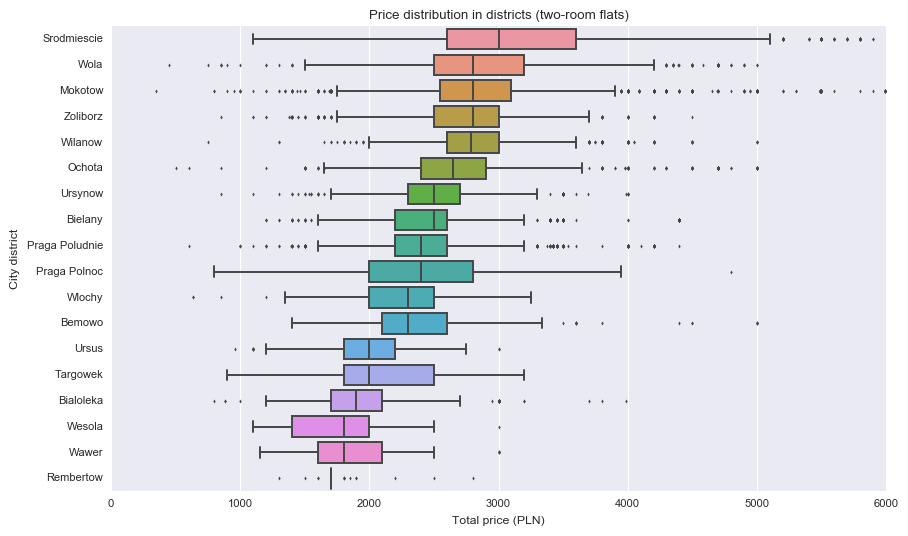

In [48]:
plt.figure(figsize=(10,6))
ranks = two_room.groupby('location')['price'].median().sort_values()[::-1].index
ax = sns.boxplot(data=two_room, y='location',x='price',fliersize=2,order=ranks)
ax.set(xlabel="Total price (PLN)", ylabel='City district', title='Price distribution in districts (two-room flats)')
plt.show()

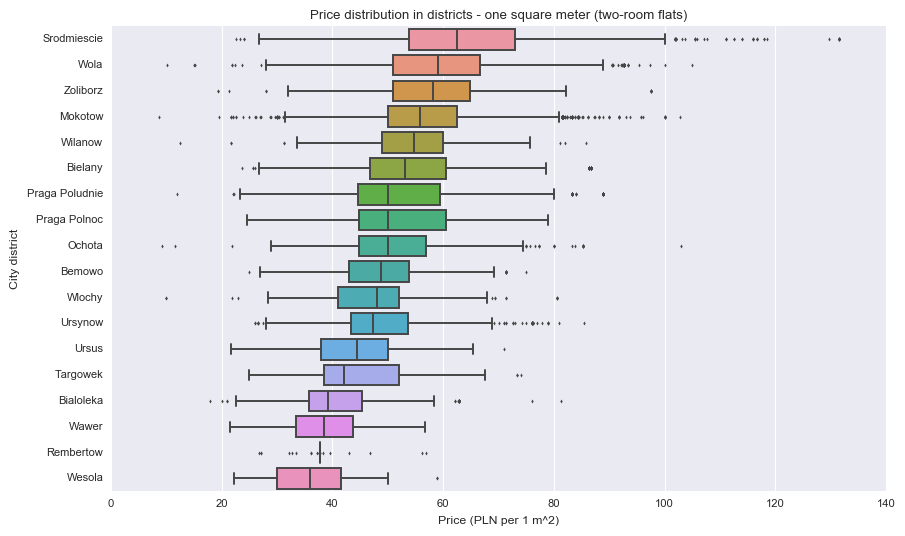

In [50]:
plt.figure(figsize=(10,6))
ranks = two_room.groupby('location')['price_m2'].median().sort_values()[::-1].index
ax = sns.boxplot(data=two_room, y='location',x='price_m2',fliersize=2, order=ranks)
ax.set(xlabel="Price (PLN per 1 m^2)", ylabel='City district', 
       title='Price distribution in districts - one square meter (two-room flats)')
plt.show()

# Three-room apartments analysis

In [54]:
three_room = dataset[(dataset['n_rooms']==3.0) & (dataset['price']<10000.00)]

In [55]:
three_room.describe()

,price,n_rooms,n_bath,size_m2,price_m2
count,27909.000000,27909.0,27909.000000,27909.000000,27909.000000
mean,3953.704862,3.0,1.128310,75.930596,52.233388
std,1386.687448,0.0,0.342696,18.407029,13.064191
min,388.000000,3.0,1.000000,10.000000,6.258065
25%,3000.000000,3.0,1.000000,63.000000,43.125000
50%,3600.000000,3.0,1.000000,72.000000,50.833333
75%,4500.000000,3.0,1.000000,85.000000,59.166667
max,9990.000000,3.0,4.000000,185.000000,125.333333


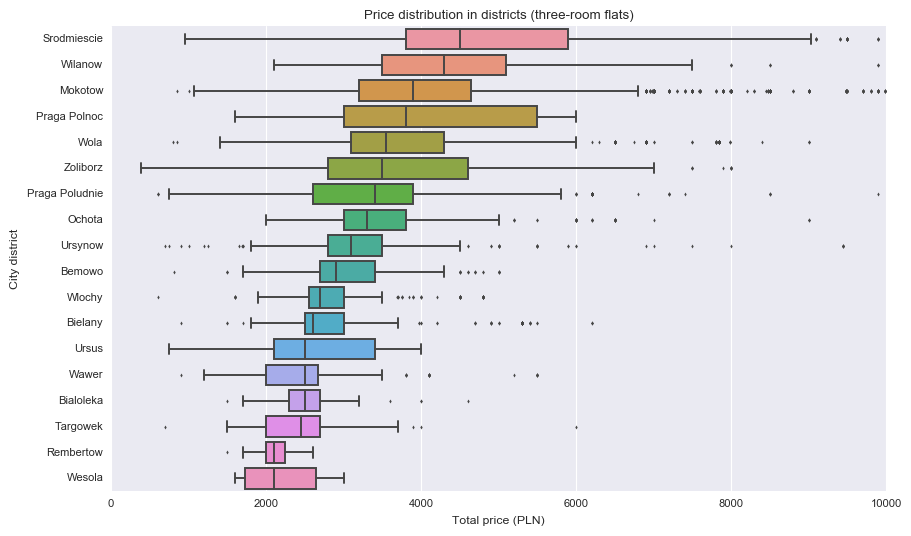

In [56]:
plt.figure(figsize=(10,6))
ranks = three_room.groupby('location')['price'].median().sort_values()[::-1].index
ax = sns.boxplot(data=three_room, y='location',x='price',fliersize=2,order=ranks)
ax.set(xlabel="Total price (PLN)", ylabel='City district', title='Price distribution in districts (three-room flats)')
plt.show()

## Linear regression model

In [58]:
district_data = dataset[dataset['location'] == 'Mokotow']

In [59]:
district_data = district_data[['price','n_rooms','size_m2','parking','n_bath']]

In [60]:
district_data.corr()

,price,n_rooms,size_m2,n_bath
price,1.000000,0.730864,0.888207,0.185724
n_rooms,0.730864,1.000000,0.817907,0.248139
size_m2,0.888207,0.817907,1.000000,0.246815
n_bath,0.185724,0.248139,0.246815,1.000000


In [61]:
parking = pd.get_dummies(district_data['parking'],prefix='parking')
model_dataset = pd.concat([district_data,parking],axis=1)
model_dataset.drop(['parking','parking_no'],axis=1,inplace=True)
model_dataset.describe()

,price,n_rooms,size_m2,n_bath,parking_basement,parking_garage,parking_street
count,29618.000000,29618.000000,29618.000000,29618.000000,29618.000000,29618.00000,29618.000000
mean,3585.067155,2.375447,63.731245,1.065636,0.110879,0.22564,0.100074
std,1842.826731,0.819187,29.583802,0.258978,0.313987,0.41801,0.300104
min,350.000000,1.000000,6.000000,1.000000,0.000000,0.00000,0.000000
25%,2600.000000,2.000000,47.000000,1.000000,0.000000,0.00000,0.000000
50%,3000.000000,2.000000,55.000000,1.000000,0.000000,0.00000,0.000000
75%,3800.000000,3.000000,70.000000,1.000000,0.000000,0.00000,0.000000
max,14500.000000,6.000000,281.000000,4.000000,1.000000,1.00000,1.000000


In [62]:
X = model_dataset.drop('price',axis=1)
y = model_dataset['price']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [65]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
coeffs = pd.DataFrame(data=lm.coef_,index=X.columns, columns=['Coefficient'])
coeffs.sort_values(by='Coefficient',inplace=True)

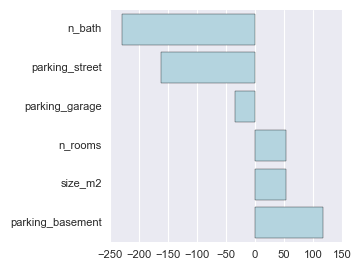

In [66]:
plt.figure(figsize=(3,3))
sns.barplot(data=coeffs.transpose(),orient='h',color='lightblue')
plt.show()

In [67]:
pred = lm.predict(X_test)

In [70]:
lm.score(X_test,y_test)

0.79538492535361405

## Models for all districts

In [71]:
districts = list(dataset['location'].unique())

In [72]:
districts

['Wola',
 'Mokotow',
 'Srodmiescie',
 'Wilanow',
 'Zoliborz',
 'Ursynow',
 'Praga Poludnie',
 'Ochota',
 'Bialoleka',
 'Praga Polnoc',
 'Ursus',
 'Bielany',
 'Wawer',
 'Bemowo',
 'Wlochy',
 'Targowek',
 'Wesola',
 'Rembertow']

In [73]:
r2_dict = dict()
model_dict = dict()

In [74]:
for district in districts:
    district_data = dataset[dataset['location'] == district]
    district_data = district_data[['price','n_rooms','size_m2','parking','n_bath']]
    parking = pd.get_dummies(district_data['parking'],prefix='parking')
    model_dataset = pd.concat([district_data,parking],axis=1)
    model_dataset.drop(['parking','parking_no'],axis=1,inplace=True)
    X = model_dataset.drop('price',axis=1)
    y = model_dataset['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    coeffs = pd.DataFrame(data=lm.coef_,index=X.columns, columns=['Coefficient'])
    coeffs.sort_values(by='Coefficient',inplace=True)
    r2_dict[district] = lm.score(X_test,y_test)
    model_dict[district] = coeffs

In [75]:
r2 = pd.DataFrame(pd.Series(r2_dict),columns=['R^2 Score'])
r2.sort_values(by='R^2 Score',ascending=False)

,R^2 Score
Wilanow,0.845721
Praga Poludnie,0.818312
Mokotow,0.795895
Ochota,0.750057
Bialoleka,0.732954
Ursynow,0.715404
Wawer,0.701144
Praga Polnoc,0.689451
Ursus,0.681131
Srodmiescie,0.679488


In [78]:
regression_parameters = pd.DataFrame(pd.Series(model_dict))
regression_parameters.loc['Bemowo'][0]

,Coefficient
parking_street,-264.732310
parking_garage,-52.336941
parking_basement,-8.884853
size_m2,30.803461
n_rooms,32.574377
n_bath,133.886881
